In [ ]:
# Kütüphaneleri İndirme, Çalışma Dizinini Ayarlama, Veri Setini İndirme
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('\Games\PyCharm\PyCharm_Projects')
dataset = pd.read_csv('SosyalMedyaReklamKampanyasi.csv')

# Veri klasörlerini belirt
okra_klasoru = r"C:\Users\AliBakiTURKOZ\OneDrive\Masaüstü\Reflectance_o"
normal_klasoru = r"C:\Users\AliBakiTURKOZ\OneDrive\Masaüstü\Reflectance_s"

# Verileri depolamak için boş bir DataFrame oluştur
tum_veriler = pd.DataFrame()

# .csv dosyalarını oku ve NaN değerleri ortalama ile doldur
for klasor, label in [(okra_klasoru, 'Okra'), (normal_klasoru, 'Normal')]:
    dosyalar = os.listdir(klasor)

    for dosya in dosyalar:
        dosya_yolu = os.path.join(klasor, dosya)
        veri = pd.read_csv(dosya_yolu)
        veri = veri.fillna(veri.mean())  # NaN değerleri ortalama ile doldur
        veri['Label'] = label  # Etiket sütunu ekle
        tum_veriler = pd.concat([tum_veriler, veri], ignore_index=True)

# Veri Setini Bağımlı ve Bağımsız Niteliklere Ayırmak
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

# Veriyi Eğitim ve Test Olarak Ayırmak
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Normalizasyon – Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# SVM Modeli Oluşturmak ve Eğitmek
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 0)
classifier.fit(X_train, y_train)

# Test Seti ile Tahmin Yapmak
y_pred = classifier.predict(X_test)

# Hata Matrisini Oluşturma
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Grafik Çizimi
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('SVM (Eğitim Seti)')
plt.xlabel('Yaş')
plt.ylabel('Maaş')
plt.legend()
plt.show()

# BENİM VERİ SETİM İÇİN DÜZENLENMİŞ HALİ

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Hata Matrisi:
[[699 427]
 [504 650]]


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

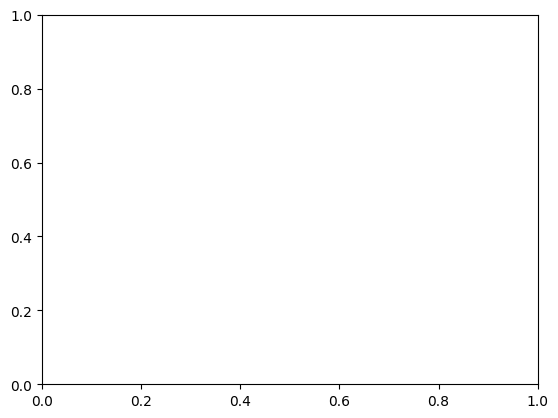

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# Google Drive API
from google.colab import drive

# Drive bağlantısını oluştur
drive.mount('/content/gdrive')

# Veri klasörlerini belirt
okra_klasoru = '/content/gdrive/MyDrive/AliBaki_TURKOZ_Engineering_Project/Data_Sets/Raisin/Raisins_20Data/Number_of_scan_40 - resouliton_228/Okralı/Black_Box/Factory_Reference/Absorbance'
normal_klasoru = '/content/gdrive/MyDrive/AliBaki_TURKOZ_Engineering_Project/Data_Sets/Raisin/Raisins_20Data/Number_of_scan_40 - resouliton_228/Normal/Black_Box/Factory_Reference/Absorbance'

# Okra verilerini depolamak için boş bir DataFrame oluştur
okra_veriler = pd.DataFrame()

# Okra klasöründeki .csv dosyalarını oku
for dosya in os.listdir(okra_klasoru):
    dosya_yolu = os.path.join(okra_klasoru, dosya)
    veri = pd.read_csv(dosya_yolu)
    okra_veriler = pd.concat([okra_veriler, veri], ignore_index=True)

# Normal verilerini depolamak için boş bir DataFrame oluştur
normal_veriler = pd.DataFrame()

# Normal klasöründeki .csv dosyalarını oku
for dosya in os.listdir(normal_klasoru):
    dosya_yolu = os.path.join(normal_klasoru, dosya)
    veri = pd.read_csv(dosya_yolu)
    normal_veriler = pd.concat([normal_veriler, veri], ignore_index=True)

# Veri setlerini birleştirme ve etiket ekleme
okra_veriler['Label'] = 'Okra'
normal_veriler['Label'] = 'Normal'
tum_veriler = pd.concat([okra_veriler, normal_veriler], ignore_index=True)

# Bağımsız ve bağımlı değişkenleri tanımlama
X = tum_veriler.iloc[:, :-1].values  # Son sütunu almadık, çünkü o etiketlerdir
y = tum_veriler.iloc[:, -1].values

# Veriyi eğitim ve test setlerine bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Normalizasyon – Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# SVM Modeli Oluşturmak ve Eğitmek
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Test Seti ile Tahmin Yapmak
y_pred = classifier.predict(X_test)

# Hata Matrisini Oluşturma
cm = confusion_matrix(y_test, y_pred)
print("Hata Matrisi:")
print(cm)

# Grafik Çizimi
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.linspace(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, num=100),
                     np.linspace(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, num=100))

# X1 ve X2'yi birleştirerek giriş özelliklerini oluştur
X_grid = np.array([X1.ravel(), X2.ravel()]).T

# NaN değerleri temizle
X_grid_cleaned = X_grid[~np.isnan(X_grid).any(axis=1)]

# Tahmin yap
y_pred_grid = classifier.predict(X_grid_cleaned)

# Sonucu yeniden şekillendir
y_pred_grid = y_pred_grid.reshape(X1.shape)

# Contour plotunu oluştur
plt.contourf(X1, X2, y_pred_grid, alpha=0.75, cmap=ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('yellow', 'green'))(i), label=j)
plt.title('SVM (Eğitim Seti)')
plt.xlabel('X Ekseni')
plt.ylabel('Y Ekseni')
plt.legend()
plt.show()
